<img src="https://quantumspain-project.es/wp-content/uploads/2022/11/Logo_QS_EspanaDigital.png" width="600px"/>
<img align="left" src="LOGOS/CSUC-BSC.png"width="340px">
<img align="rigth" src="LOGOS/USC-CESGA.png"width="330px">
<img align="left" src="LOGOS/COMPUTAEX-CENITS.png"width="330px">
<img align="rigth" src="LOGOS/cidihub-IAC.png"width="330px">
<img align="center" src="LOGOS/UAM-Logo.png"width="280px">



<img   src="LOGOS/Logo_TalentQ.png" align=center width="120"/>
<img   src="LOGOS/QSpain_14_03_23__.png" align=center width="900"/>
<br>
<br>



<a id="#realismolocal"></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(0,0,900, 0.3);">
<b>La Moneda Cuántica</b>
</table>   

## La Moneda Clásica

La *moneda clásica* es un sistema físico que alberga un bit de información: cara = 0, cruz = 1.

*Tirar una moneda clásica* al aire equivale ponerla en un estado incierto con probabilidad 1/2 para cada opción final: cara o cruz. 

### Procedimiento 

Hacer una serie de tiradas dobles sucesivas con una moneda. Apuntar el resultado asignando valores *cara* = +1, *cruz =* -1.

Hacerlo de dos formas distintas. 

1. observando y anotando el resultado de la tirada intermedia


2. observando y anotando sólamente el resultado de la tirada segunda. 


Con el resultado de  dos series de 50 tiradas doble hallar los promedios y calcular los valores medios de la variable aleatoria $\pm 1$. 

## La moneda cuántica

Una moneda cuántica alberga un cúbit. Un ejemplo puede ser una particula con espín 1/2 (un electrón).

Al medir la componente $z$ con un aparato $Z$ obtendremos $|\hbox{cara}\rangle = |0\rangle $ si sale $z = +1$ ó $|\hbox{cruz}\rangle = |1\rangle $ si sale $z = -1$.


*Tirar una moneda cuántica* consiste en ponerla en una superposición coherente equilibrada $|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ de los dos resultados finales posibles.



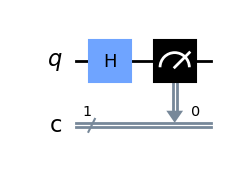

In [7]:
%matplotlib inline
import numpy as np 
from qiskit import Aer, QuantumCircuit, execute

qc = QuantumCircuit(1,1)

qc.h(0)
qc.measure(0,0) 
qc.draw('mpl')

La medida de $Z$ es compatible con una probabilidad 1/2 de resultados para cada opción

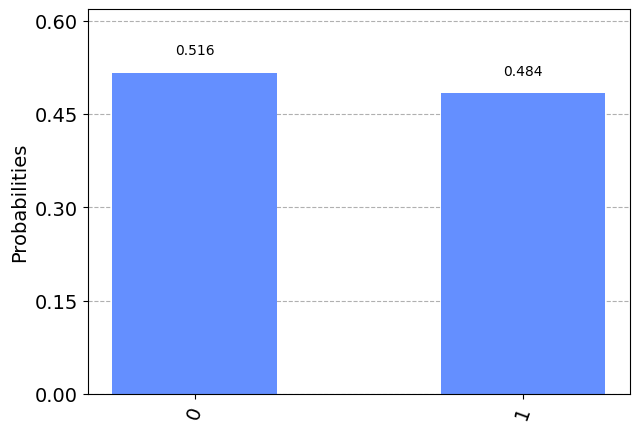

In [2]:
M_simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc,M_simulator).result().get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts) # Mostramos un histograma de resultados

### Procedimiento 

Modifica el circuito para que efectúe dos tiradas  y efectúe una medición final. 

Evalúa las dos opciones análogas al caso anterior

1. haciendo una medición intermedia después de la primera tirada


2. haciendo sólamente la medición final. 


Con los resultados obtenidos, halla los valores medios de $Z$. Observa la diferencia que hay con el caso clásico.


<a id="#realismolocal"></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(0,0,900, 0.3);">
<b>El Estado GHZ</b>
</table>   

Imagina un sistema compuesto por tres sub-sistemas. Cada uno de ellos contiene *dos variables de estado*, $X$ e $Y$ que pueden encontrarse en uno de dos valores, $x, y = +1$ ó $-1$. Queremos saber si es posible que el conjunto de tres sistemas se halle en un estado global tal que, al observar los valores  $x$ e $y$ se verifiquen las siguientes cuatro ecuaciones

$$
yyx=+1~,~~~yxy=+1~,~~~xyy=+1~,~~~xxx=-1~,~~~
$$



## Procedimiento clásico: 

hay que preparar tres cajas y  doce objetos. Pueden ser seis papeles rojos y seis azules. En tres de cada color pintaremos el número +1 y en los otros tres, -1. Pondremos boca abajo todos los papeles. 

En cada ronda, pondremos 2 papeles rojos y 2 azules en cada caja los poenmos boca abajo. Esto configurará un estado posible del sistema.

A continuación se extraen y se ponen boca arriba al lado de cada caja, de forma que ahora se puedan calcular los valores de yyx, yxy,yyx, y xxx.  

En un recuadro donde cada columna sea una ecuación, y cada fila una tirada, se pone una v en la ecuación que se verifica y una x en la que se viola. 

Repetir el experimento 10 veces


## La solución cuántica

Un sistema cuántico formado por tres cúbits tiene 8 estados posibles

$$
|\hbox{000}\rangle,|\hbox{001}\rangle,|\hbox{010}\rangle,|\hbox{011}\rangle,|\hbox{101}\rangle,|\hbox{110}\rangle,|\hbox{111}\rangle,
$$

Pero ahora un estado genérico es una combinación lineal de esta base. En particular el estado GHZ (también llamado *estado gato* es el siguiente

$$
|\hbox{GHZ}\rangle = \frac{1}{\sqrt{2}}(|\hbox{000}\rangle-|\hbox{111}\rangle)
$$

El siguiente circuito es capaz de fabricar este estado

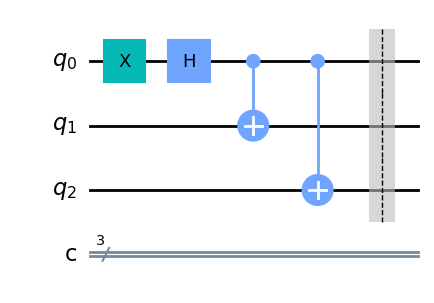

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
qc= QuantumCircuit(3,3) 

qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()
qc.draw(output='mpl')

vamos a comprobarlo

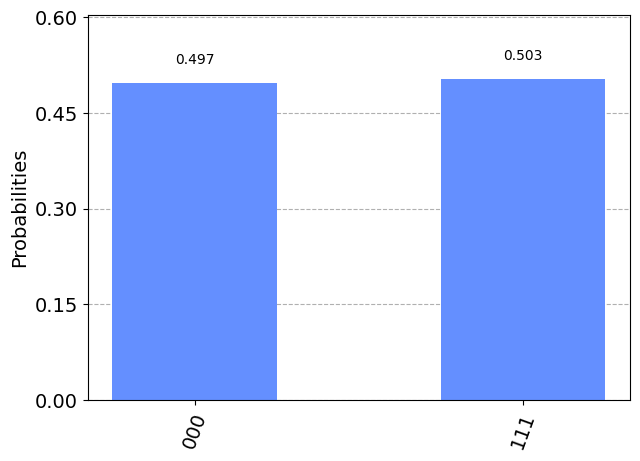

In [4]:
M_simulator = Aer.get_backend('qasm_simulator')
import copy

qc_test = copy.deepcopy(qc)
qc_test.measure([0,1,2],{0,1,2})

counts = execute(qc_test,M_simulator).result().get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts) # Mostramos un histograma de resultados

Las variables de estado $X$ e $Y$ ahora serán operadores de medida a los largo de los ejes $x$ e $y$ de la esfera de Bloch. 

Para medir $X$ en un cúbit  hay que añadir una puerta $H$ antes del aparato de medida

Para medir $Y$ en un cúbit  hay que añadir una puerta $S^\dagger H$ antes del aparato de medida


### YYX

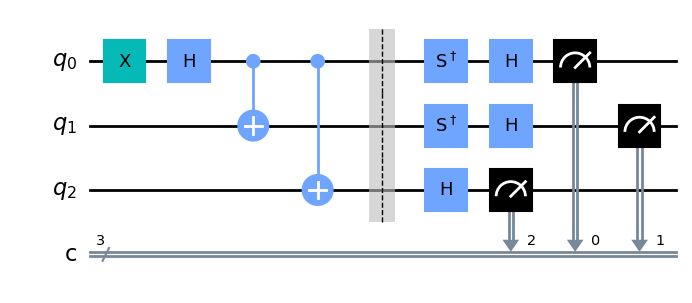

In [5]:

qc_yyx = copy.deepcopy(qc)

qc_yyx.sdg(0)
qc_yyx.h(0)
qc_yyx.sdg(1)
qc_yyx.h(1)
qc_yyx.h(2)


qc_yyx.measure([0,1,2],{0,1,2})
qc_yyx.draw('mpl')

{'101': 5, '110': 1, '000': 4}


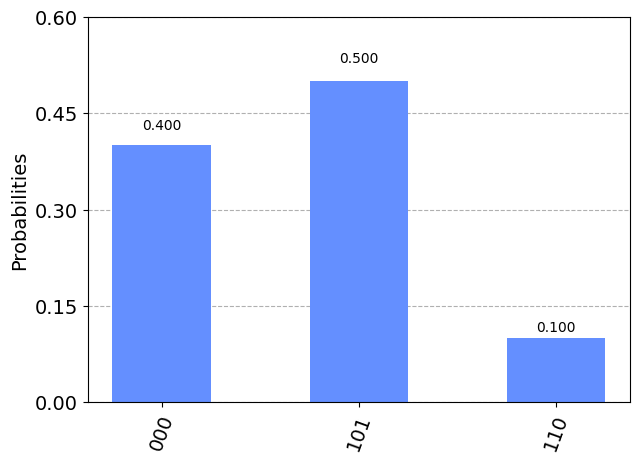

In [28]:
shots = 1
yyx_counts = execute(qc_yyx,M_simulator,shots = shots).result().get_counts()
from qiskit.tools.visualization import plot_histogram
print(yyx_counts)
plot_histogram(yyx_counts) # Mostramos un histograma de resultados

Para cada resultado convertimos una cadena de bits $0,1$ a una cadena de valores $+1,-1$, por ejemplo 

$$
(s_1s_2s_3) = (010) ~~~~\to ~~~~ (-1)^{s_1}(-1)^{s_2}(-1)^{s_3}= (-1)^{s_1 + s_2 + s_2}
$$


In [7]:
for bitstring, amps  in yyx_counts.items():
    print((-1)**(sum([int(bit) for bit in bitstring])))


1


Ahora solo te queda completar el procedimiento.

### YXY

In [84]:

qc_yxy = copy.deepcopy(qc)



### XYY

In [85]:

qc_xyy = copy.deepcopy(qc)



### XXX

In [17]:

qc_xxx = copy.deepcopy(qc)



<a id="#realismolocal"></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(0,0,900, 0.3);">
<b>Desigualdades de Bell</b>
</table>   

Considera un sistema bi-partito en un **estado de Bell**

$$
|B_{11}\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle )
$$

donde Alice controla el primer cúbit y Bob el segundo.

Vamos primero a generarlo

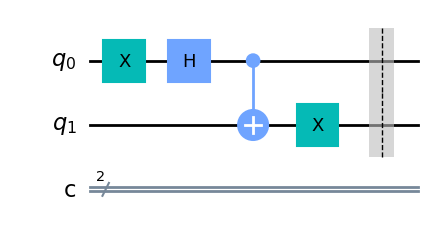

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

qc_Bell= QuantumCircuit(2,2) 

qc_Bell.x(0)
qc_Bell.h(0)
qc_Bell.cx(0,1)
qc_Bell.x(1)
qc_Bell.barrier()
qc_Bell.draw(output='mpl')

- Dibuja el estado instantáneo después de cada puerta cuántica y convéncete de que el estado a la salida del circuito es $|\hbox{B}_{11}\rangle $.


- Vamos a comprobar que el estado es el correcto, haciendo *tomografía* de sus amplitudes usando detectores $Z$ para Alice y Bob

Bell counts= {'10': 533, '01': 491}


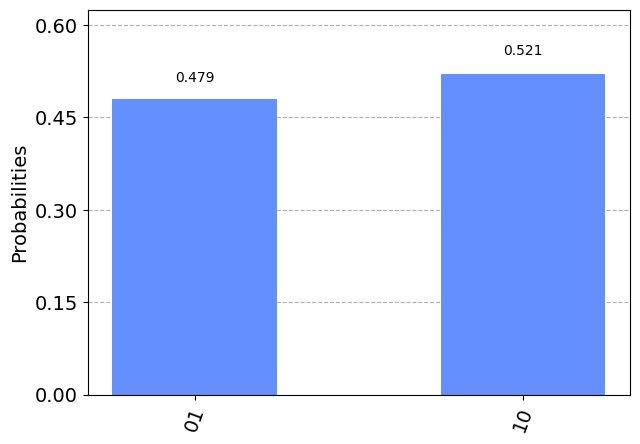

In [9]:
M_simulator = Aer.get_backend('qasm_simulator')
import copy

qc_Bell_test = copy.deepcopy(qc_Bell)
qc_Bell_test.measure([0,1],{0,1})

counts = execute(qc_Bell_test,M_simulator).result().get_counts()
print("Bell counts=",counts)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts) # Mostramos un histograma de resultados

Alice y Bob miden este estado con sendos detectores situados en el plano $Z$-$X$ y orientados un cierto ángulo $\theta_A$ y $\theta_B$ con respecto al eje $Z$. Llamaremos a estos detectores $Z(\theta_A)$ y $Z(\theta_B)$.

La forma efectiva de *girar* el detector es  *rotar inversamente el estado* antes de su entrada en un detector usual tipo $Z$.

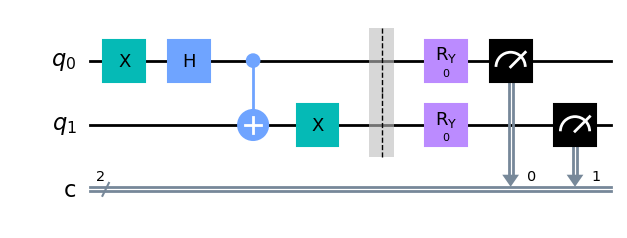

In [10]:
qc_AB = copy.deepcopy(qc_Bell)
theta_A = 0.*np.pi
theta_B = 0.*np.pi


qc_AB.ry(-theta_A,0) #el ángulo cambiado de signo es equivalente a una rotación inversa
qc_AB.ry(-theta_B,1)

qc_AB.measure([0,1],[0,1])

qc_AB.draw('mpl')

La *medida combinada* en ambos detectores arroja una serie de resultados $\{00,01,10,11\}$

counts= {'10': 5007, '01': 4993}


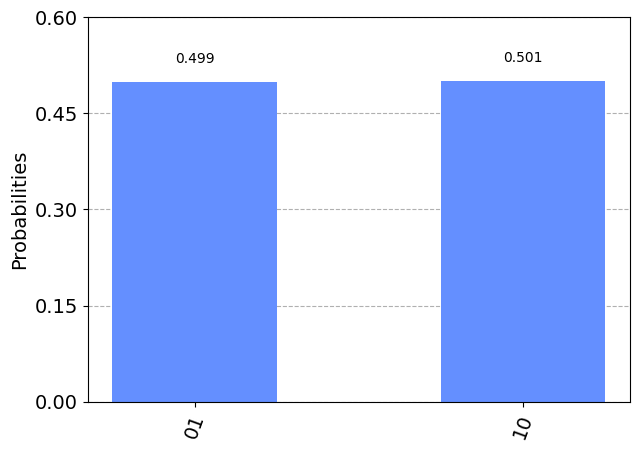

In [11]:
shots = 10000
counts = execute(qc_AB,M_simulator,shots = shots).result().get_counts()
from qiskit.tools.visualization import plot_histogram
print("counts=",counts)
plot_histogram(counts) # Mostramos un histograma de resultados

Alice y Bob ponen en común sus resultados y calculan el valor medio del producto de las medidas $(-1)^{s_A}
(-1)^{s_B} =\pm 1$  donde $s_{A,B} = 0,1$.

$$
C(A,B) = \langle Z_AZ_B\rangle = \sum_{s_A,s_B = 0,1} (-1)^{s_A}(-1)^{s_B}  \frac{n(s_A,s_B)}{N}
$$

In [12]:
C_AB = 0
for bitstring, n_sAsB  in counts.items():
      C_AB += (-1)**(sum([int(bit) for bit in bitstring]))*(n_sAsB/shots)

C_AB

-1.0

**Ejercicio** (opcional)

Ejecuta este código cambiando los ángulos $\theta_A$ y $\theta_B$. Cuál de las siguientes expresiones se ajusta mejor al resultado $C(A,B)$?

- $  ~~\,\cos(\theta_A+\theta_B)$

- $-\cos(\theta_A+\theta_B)$

- $ ~~\,\cos(\theta_A-\theta_B)$

- $-\cos(\theta_A-\theta_B)$

<br>

**Pregunta**: 

¿cómo darías sentido a esta medida en un experimento clásico? (piensa en monedas)

## La desigualdad CHSH

Comenzamos fijando un valor para $\varphi \in [0,\pi]$

- Alice *rota* su detector $Z_A$ a una de dos posibilidades  $A \to\theta_A = 0^\circ$,  $A'\to \theta'_A = 90^\circ$.


- Bell *rota* su detector $Z_B$ a una de dos posibilidades  $B\to\theta_B(\varphi) =\varphi +  45^\circ$,  $~~B'\to\theta'_B(\varphi) =\varphi + 90^\circ$.


Por tanto, en ambos casos, los detectores son ortogonales para Alice y Bob, pero presentan una rotación relativa de ángulo $\varphi$

<div>
<img src="LOGOS/EPR.png" width="50%" style="margin:auto"/>
</div>




#### Procedimiento:

- Hacer una lista  $\varphi =\left[ \rule{0mm}{5mm} 0,\,  0.1\displaystyle,\, 0.2,....,\,1\right] \times \displaystyle \frac{\pi}{2} $ y para cada valor de dicha lista calcular las cantidades
<br>
<br>

$$
\begin{array}{| l | c | c |}
 \hline  
\hbox{BSC}          & C(A,B) &C(A',B')  \\ \hline
\hbox{CESGA-IGFAE} & C(A,B')&  C(A',B) \\ \hline
\hbox{UAM} & C(A',B)  & C(A',B') \\ \hline
\hbox{IAC-CIDIHUB} & C(A,B') & C(A,B) \\  \hline
\hbox{COMPUTAEX-CENITS} & C(A,B') & C(A',B') \\ \hline
\end{array}
$$



<br>
<br>


- Poner en común **las cuatro listas** y obtener, a partir de ellas, la siguiente lista de valores 
<br>
<br>
$$
R(\varphi) = |C(A,B)+C(A,B')+C(A',B)-C(A',B')|
$$
<br>
es decir $[R(\varphi_0),R(\varphi_1),...,R(\varphi_{10})]$


#### Discusión

- Si  $Z_A$ y $Z_B$ fuesen variables aleatorias binarias clásicas, podemos ver que esta cantidad **¡ nunca podría superar el valor** $2$ **!**

\begin{eqnarray}
R &=& |\langle Z_A Z_B\rangle + \langle Z_A Z_{B'}\rangle + \langle Z_{A'} Z_{B}\rangle + \langle Z_{A'} Z_{B'}\rangle | \nonumber\\ \rule{0mm}{6mm}
&=& | \langle Z_A(Z_B +Z_{B'}\rangle + \langle Z_{A'}(Z_B -Z_{B'})\rangle | \nonumber\\
&\leq & \rule{0mm}{6mm} 2 
\end{eqnarray}


- ¿Hay algún valor de la lista para el que se obtenga $R>2$?
